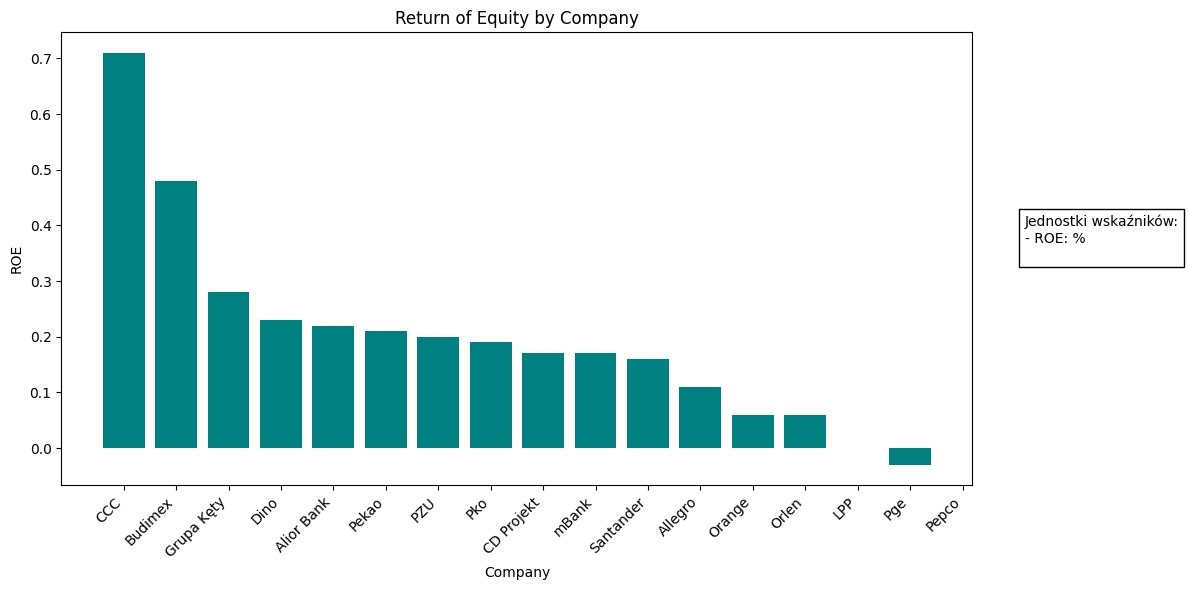

In [54]:
#Return of Equity by Company using plt // Zwrot kapitału własnego według spółki
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('all_companies_wide_with_ratios.csv')
df_sorted = df.sort_values(by='ROE_reported', ascending=False)

plt.figure(figsize=(12,6))
plt.bar(df_sorted['Company'], df_sorted['ROE_reported'], color='teal')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Company')
plt.ylabel('ROE')
plt.title('Return of Equity by Company')

unit_text = (
    "Jednostki wskaźników:\n"
    "- ROE: %\n"
)
ymin,ymax = plt.ylim()
plt.text(
    x=plt.xlim()[1]+1, 
    y=(ymin +ymax)/ 2,   
    s=unit_text,
    fontsize=10,
    bbox=dict(facecolor='white', edgecolor='black')
)

plt.tight_layout()
plt.show()


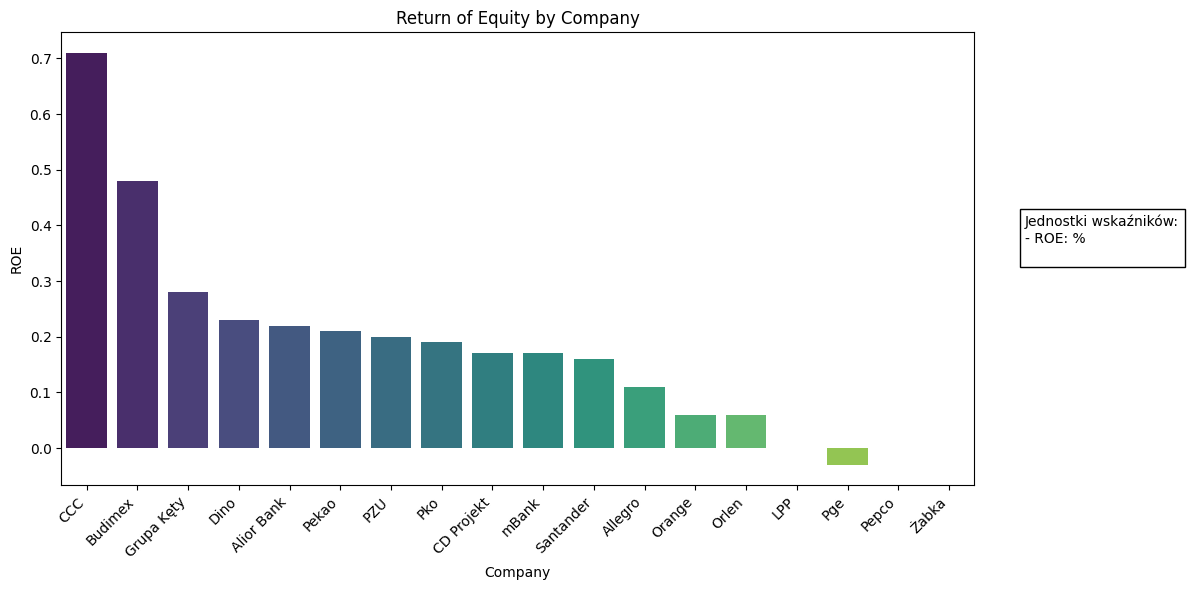

In [55]:
#Return of Equity by Company using seaborn // zwrot kapitału własnego
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('all_companies_wide_with_ratios.csv')
df_sorted = df.sort_values(by='ROE_reported', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x='Company', y='ROE_reported', data=df_sorted, hue='Company', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Company')
plt.ylabel('ROE')
plt.title('Return of Equity by Company')
unit_text = (
    "Jednostki wskaźników:\n"
    "- ROE: %\n"
)

ymin,ymax = plt.ylim()
plt.text(
    x=plt.xlim()[1]+1, 
    y=(ymin +ymax)/ 2,   
    s=unit_text,
    fontsize=10,
    bbox=dict(facecolor='white', edgecolor='black')
)
plt.tight_layout()
plt.show()

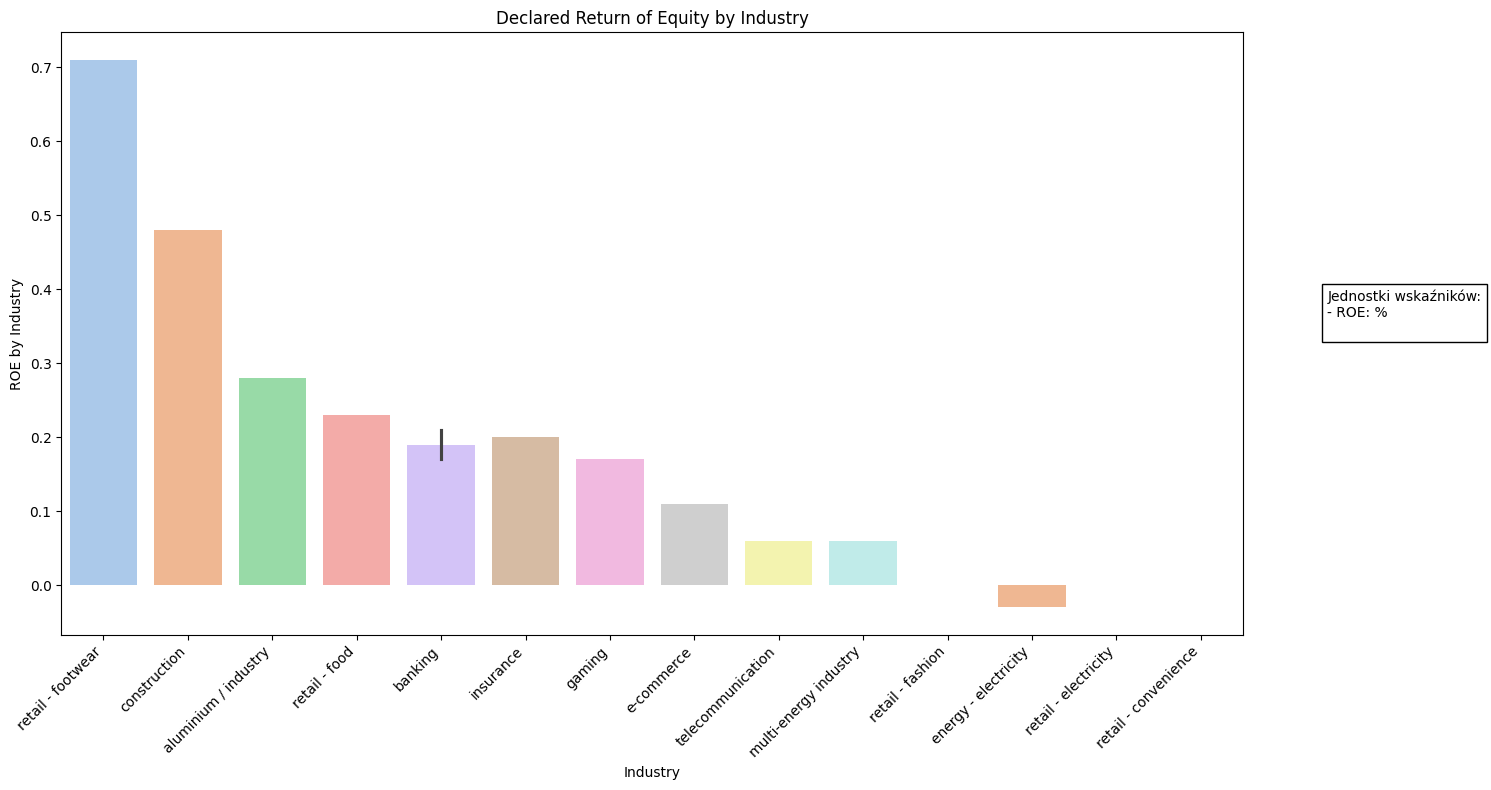

In [56]:
#Average Return of Equity by Industry // Średnia stopa zwrotu z kapitału własnego według branży
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

df = pd.read_csv('all_companies_wide_with_ratios.csv')

df_grouped = df.groupby('Industry', as_index=False)['ROE_reported'].mean()
df_sorted = df.sort_values(by="ROE_reported", ascending=False)

plt.figure(figsize=(15,8))
sns.barplot(x="Industry", y="ROE_reported", data=df_sorted, hue="Industry",  palette='pastel')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Industry')
plt.ylabel('ROE by Industry')
plt.title('Declared Return of Equity by Industry')

unit_text = (
    "Jednostki wskaźników:\n"
    "- ROE: %\n"
)

ymin,ymax = plt.ylim()
plt.text(
    x=plt.xlim()[1]+1, 
    y=(ymin +ymax)/ 2,   
    s=unit_text,
    fontsize=10,
    bbox=dict(facecolor='white', edgecolor='black')
)
plt.tight_layout()
plt.show()

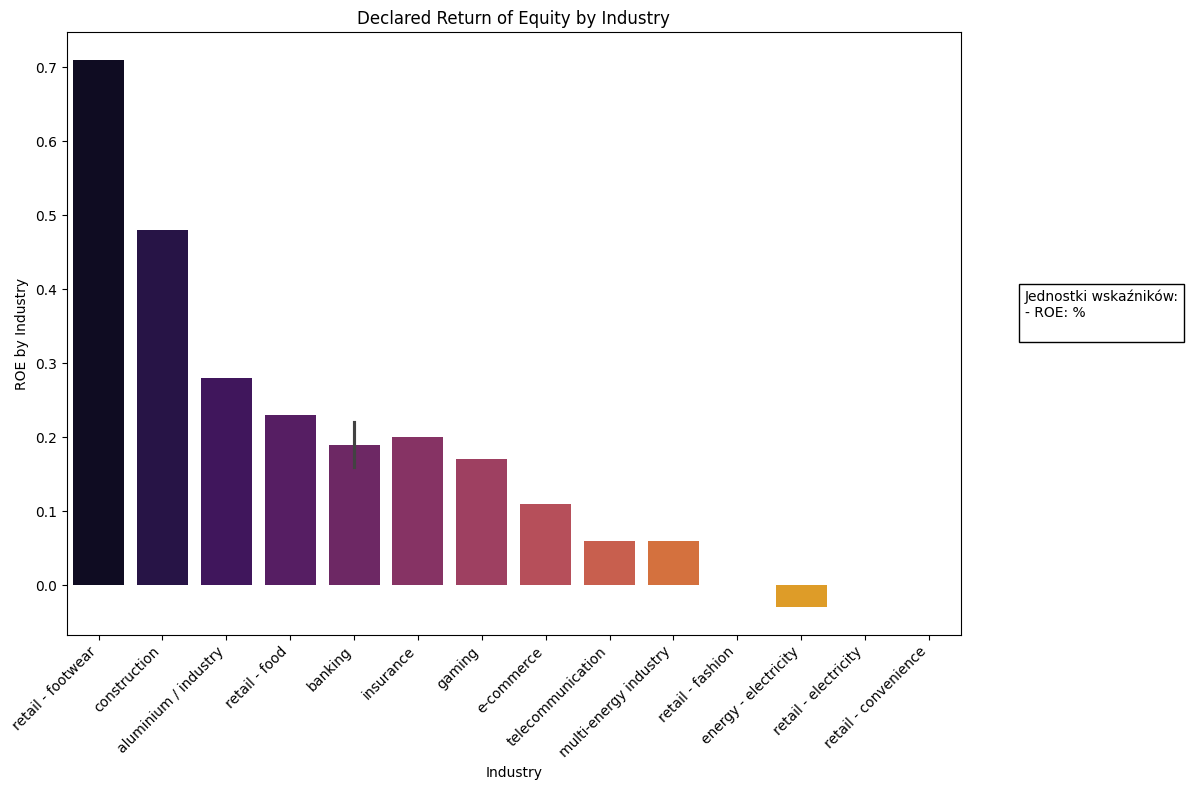

In [58]:
#Median ROE per Industry // Mediana zwrotu z kapitału własnego według branży
import seaborn as sns
import numpy as np
from numpy import median
import matplotlib.pyplot as plt

df = pd.read_csv('all_companies_wide_with_ratios.csv')
df_sorted=df.sort_values(by='ROE_reported', ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x="Industry", y="ROE_reported", data=df_sorted, estimator=median, hue="Industry", palette='inferno')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Industry')
plt.ylabel('ROE by Industry')
plt.title('Declared Return of Equity by Industry')
unit_text = (
    "Jednostki wskaźników:\n"
    "- ROE: %\n"
    
)

ymin,ymax = plt.ylim()
plt.text(
    x=plt.xlim()[1]+1, 
    y=(ymin +ymax)/ 2,   
    s=unit_text,
    fontsize=10,
    bbox=dict(facecolor='white', edgecolor='black')
)
plt.tight_layout() 
plt.show()


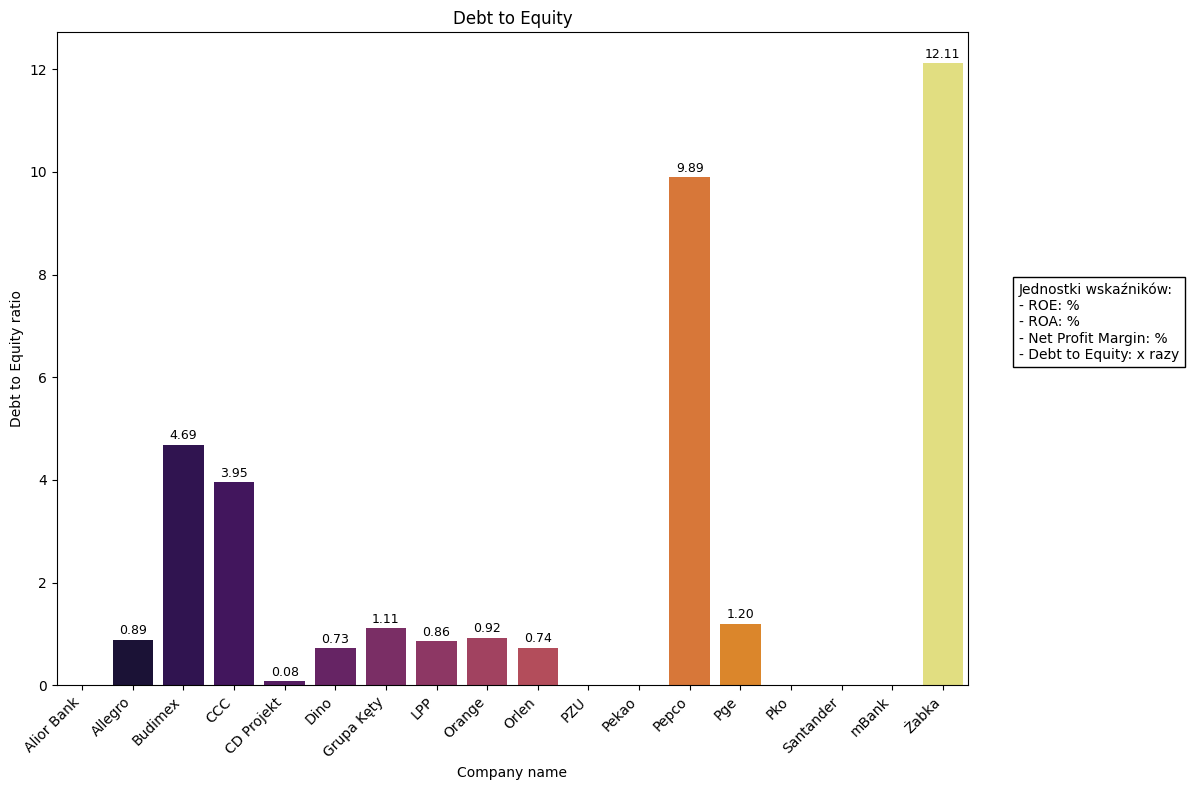

In [59]:
#Debt to Equity Ratio // Zadłużenie firm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('all_companies_wide_with_ratios.csv')
df_sorted = df.sort_values(by="Company", ascending=False)

plt.figure(figsize=(12,8))
ax = sns.barplot(x="Company", y="Debt_to_Equity_Q1_2025", data=df, hue="Company", palette="inferno")
for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):
        ax.text(p.get_x() + p.get_width()/2, height + 0.05, f'{height:.2f}', 
                ha='center', va='bottom', fontsize=9)

plt.xticks(rotation=45, ha="right")
plt.xlabel('Company name')
plt.ylabel('Debt to Equity ratio')
plt.title("Debt to Equity")
unit_text = (
    "Jednostki wskaźników:\n"
    "- ROE: %\n"
    "- ROA: %\n"
    "- Net Profit Margin: %\n"
    "- Debt to Equity: x razy"
)

ymin,ymax = plt.ylim()
plt.text(
    x=plt.xlim()[1]+1, 
    y=(ymin +ymax)/ 2,   
    s=unit_text,
    fontsize=10,
    bbox=dict(facecolor='white', edgecolor='black')
)
plt.tight_layout()
plt.show()

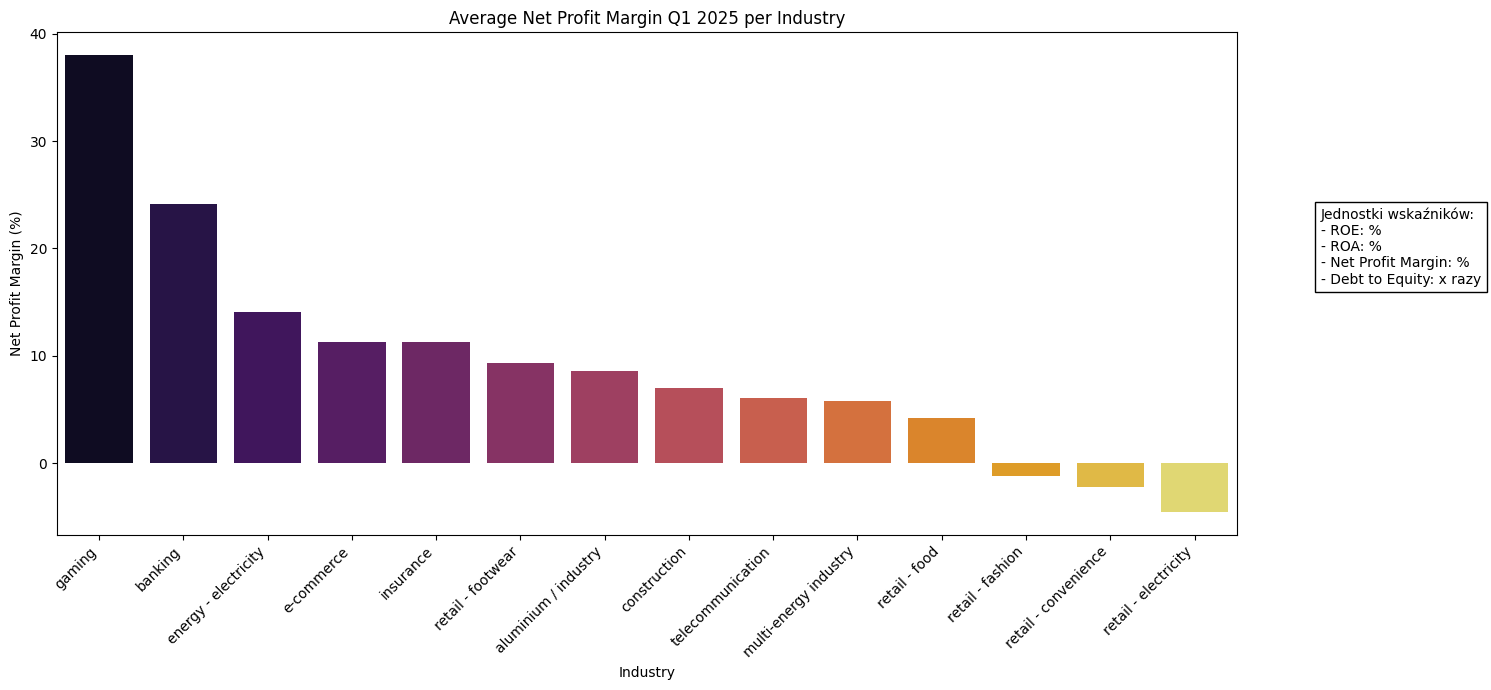

In [60]:
#Average Net Profit Margin Q1 2025 per Industry // Średnia marża zysku netto w I kw. 2025 r. według branży 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['Net_Profit_Margin'] = df['Net_Profit'] / df['Revenue']*100
industry_margin = df.groupby('Industry')['Net_Profit_Margin'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(15,7))
sns.barplot(x='Industry', y='Net_Profit_Margin', data=industry_margin, hue='Industry' , palette='inferno')
plt.xticks(rotation=45, ha='right')
plt.title('Average Net Profit Margin Q1 2025 per Industry')
plt.xlabel('Industry')
plt.ylabel('Net Profit Margin (%)')
unit_text = (
    "Jednostki wskaźników:\n"
    "- ROE: %\n"
    "- ROA: %\n"
    "- Net Profit Margin: %\n"
    "- Debt to Equity: x razy"
)

ymin,ymax = plt.ylim()
plt.text(
    x=plt.xlim()[1]+1, 
    y=(ymin +ymax)/ 2,   
    s=unit_text,
    fontsize=10,
    bbox=dict(facecolor='white', edgecolor='black')
)
plt.tight_layout()
plt.show()


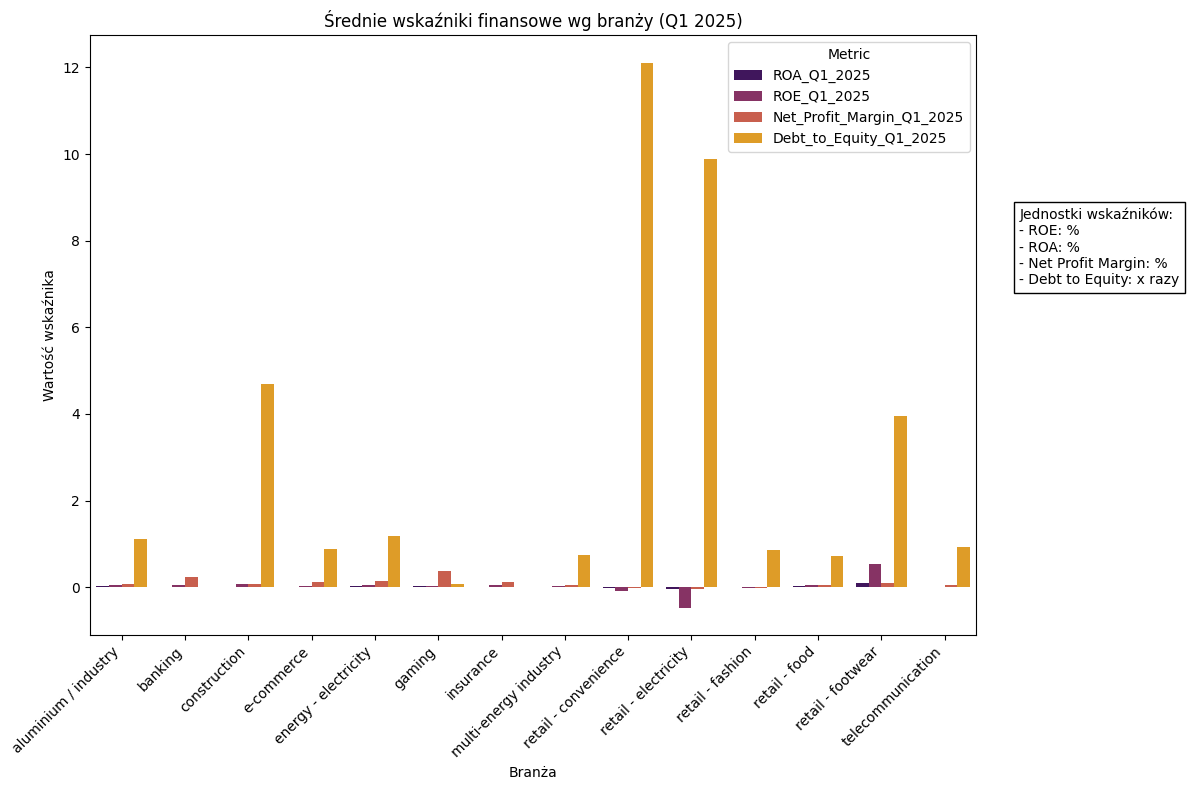

In [46]:
#average financial indicators by industry // średnie wskaźniki finansowe wg branż
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Grupowanie i obliczanie średnich
df_grouped = df.groupby('Industry')[['ROA_Q1_2025', 'ROE_Q1_2025', 'Net_Profit_Margin_Q1_2025', 'Debt_to_Equity_Q1_2025']].mean().reset_index()

# Przekształcenie danych do formatu długiego
df_melted = df_grouped.melt(id_vars='Industry', var_name='Metric', value_name='Value')

# Wykres
plt.figure(figsize=(12,8))
sns.barplot(x='Industry', y='Value', hue='Metric', data=df_melted, palette='inferno')

plt.xticks(rotation=45, ha='right')
plt.title('Średnie wskaźniki finansowe wg branży (Q1 2025)')
plt.xlabel('Branża')
plt.ylabel('Wartość wskaźnika')
unit_text = (
    "Jednostki wskaźników:\n"
    "- ROE: %\n"
    "- ROA: %\n"
    "- Net Profit Margin: %\n"
    "- Debt to Equity: x razy"
)
plt.text(
    x=plt.xlim()[1]*1.05, 
    y=len(df_grouped) / 2,   
    s=unit_text,
    fontsize=10,
    bbox=dict(facecolor='white', edgecolor='black')
)
plt.tight_layout()
plt.show()


In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('all_companies_wide_with_ratios.csv')
df.describe()

,Assets,Capex,Cashflow_Financing,Cashflow_Investing,Cashflow_Net,Cashflow_Operating,Current_Ratio,Debt_Service_Ratio,Depreciation,EBITDA,...,Revenue,Share_Capital,Short_Term_Liabilities,current assets,fixed assets,ROA_Q1_2025,ROE_Q1_2025,EBITDA_Margin_Q1_2025,Net_Profit_Margin_Q1_2025,Debt_to_Equity_Q1_2025
count,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,11.00000,11.000000,1.800000e+01,1.800000e+01,...,1.800000e+01,1.800000e+01,1.200000e+01,1.200000e+01,1.200000e+01,18.000000,18.000000,18.000000,18.000000,12.000000
mean,1.389089e+11,-6.736154e+08,-3.393187e+08,-8.672161e+08,-1.833835e+08,1.023151e+09,1.70000,12.424545,4.685813e+08,2.033374e+09,...,9.513825e+09,1.648491e+09,1.034577e+10,1.120774e+10,2.806590e+10,0.013111,0.032222,0.250611,0.126889,3.096333
std,1.803742e+11,1.591939e+09,1.129177e+09,2.546360e+09,5.880934e+09,6.286715e+09,1.75517,8.556014,7.698466e+08,2.586380e+09,...,1.670076e+10,4.491653e+09,1.780166e+10,2.091600e+10,5.433603e+10,0.028290,0.175279,0.145215,0.117652,3.968746
min,1.919200e+09,-6.801000e+09,-2.089880e+09,-6.786000e+09,-1.995884e+10,-1.768845e+10,0.54000,2.630000,1.530000e+07,1.840000e+07,...,2.263050e+08,5.760000e+06,2.042050e+08,1.097200e+09,8.220000e+08,-0.043000,-0.467000,0.032000,-0.045000,0.078000
25%,8.039852e+09,-5.059512e+08,-6.154618e+08,-8.077542e+08,-2.441250e+08,4.282175e+07,0.88000,4.665000,7.581900e+07,4.721445e+08,...,2.185250e+09,2.870000e+07,1.463062e+09,1.753633e+09,2.112634e+09,0.003500,0.028250,0.135750,0.058750,0.826000
50%,2.305910e+10,-1.684480e+08,-2.060000e+08,-2.294575e+08,-2.400000e+07,4.219465e+08,1.16000,11.130000,2.080000e+08,8.707190e+08,...,5.103937e+09,1.329240e+08,4.201550e+09,3.983000e+09,6.644420e+09,0.006500,0.041500,0.261000,0.102500,1.015500
75%,2.570810e+11,-4.689650e+07,-9.647750e+06,-3.736375e+07,1.173313e+09,2.773147e+09,1.54000,16.970000,5.082400e+08,2.659689e+09,...,9.442074e+09,1.192973e+09,5.789253e+09,5.435150e+09,1.629562e+10,0.021250,0.050750,0.370250,0.214250,4.136500
max,5.313550e+11,-1.020000e+07,3.109000e+09,3.372000e+09,8.723000e+09,1.574200e+10,6.80000,29.930000,3.347000e+09,1.016700e+10,...,7.353500e+10,1.918400e+10,5.954500e+10,7.366900e+10,1.869750e+11,0.106000,0.532000,0.496000,0.380000,12.112000


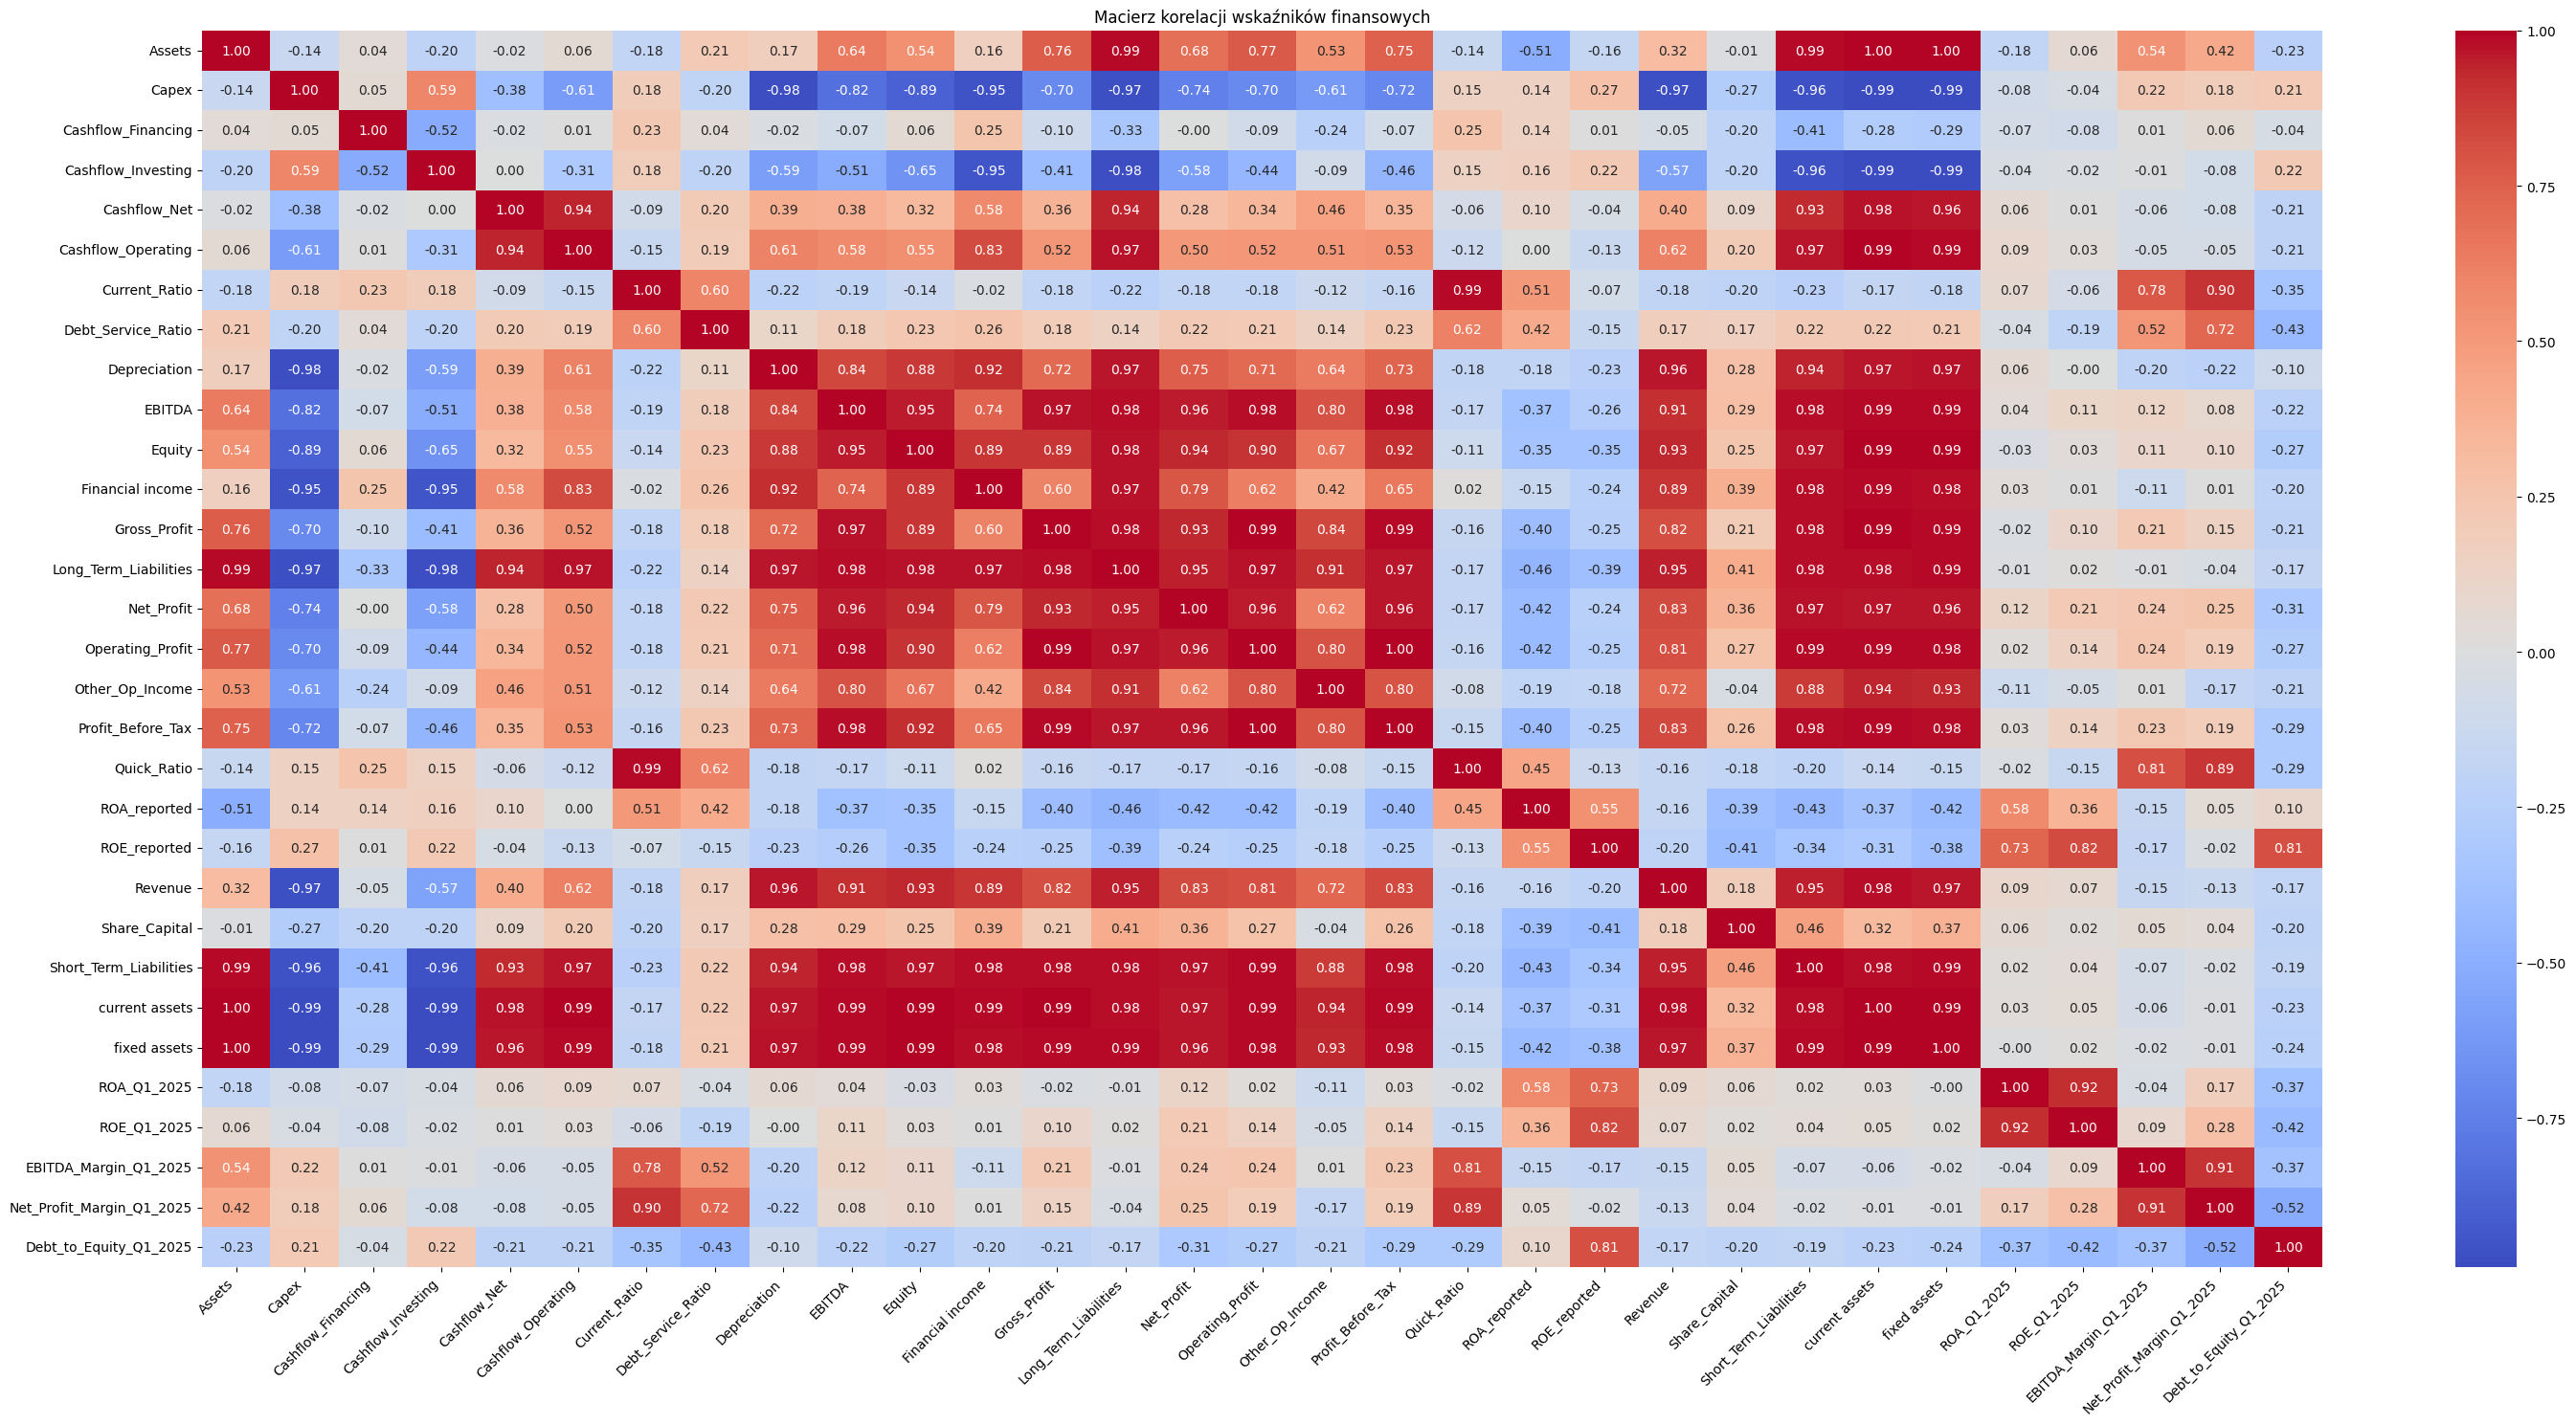

In [26]:
#CORRELATION / KORELACJA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(30,15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Macierz korelacji wskaźników finansowych")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


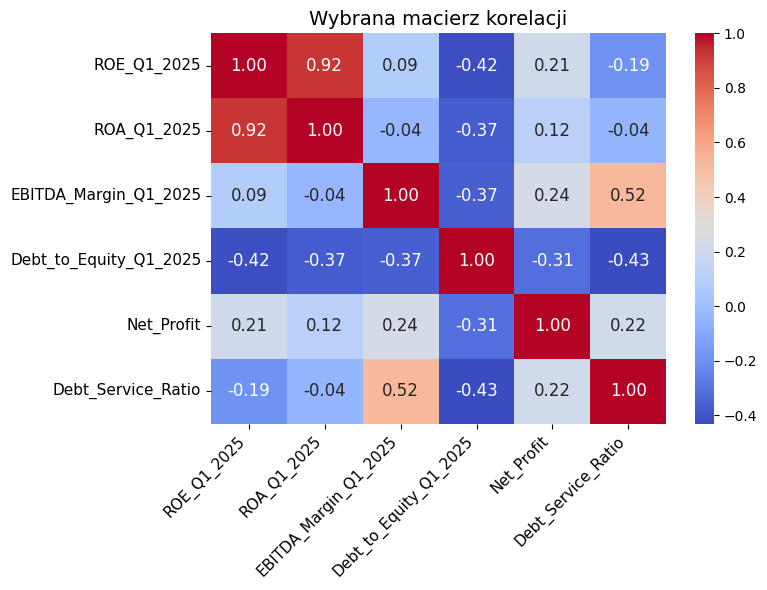

In [4]:
#PARTIAL CORRELATION / KORELACJA CZĘŚCIOWA 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('all_companies_wide_with_ratios.csv')

selected_columns = [
    'ROE_Q1_2025',
    'ROA_Q1_2025',
    'EBITDA_Margin_Q1_2025',
    'Debt_to_Equity_Q1_2025',
    'Net_Profit',
    'Debt_Service_Ratio',
]

correlation_matrix = df[selected_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            annot_kws={"size": 12})

plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)
plt.title("Wybrana macierz korelacji", fontsize=14)
plt.tight_layout()
plt.show()

Korelacja ROA i ROE: 0.55
Korelacja Net Profit Margin i Debt-to-Equity: -0.52


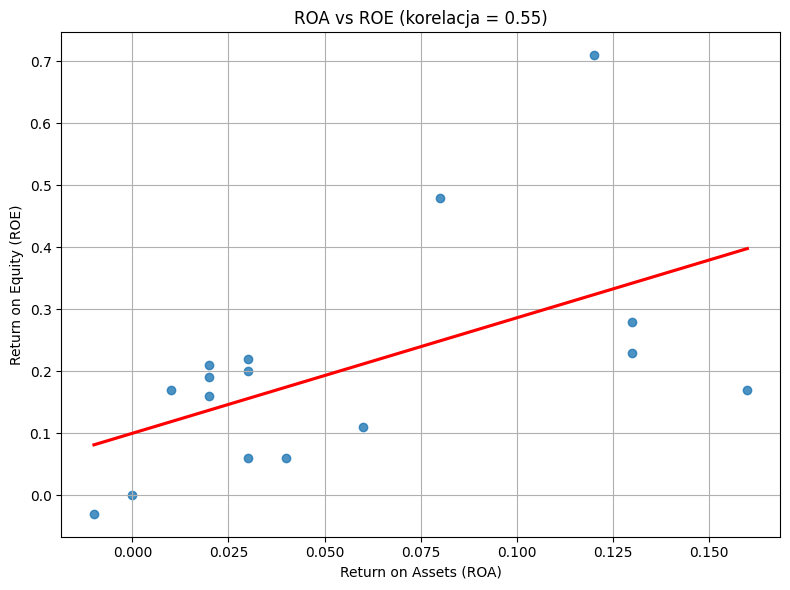

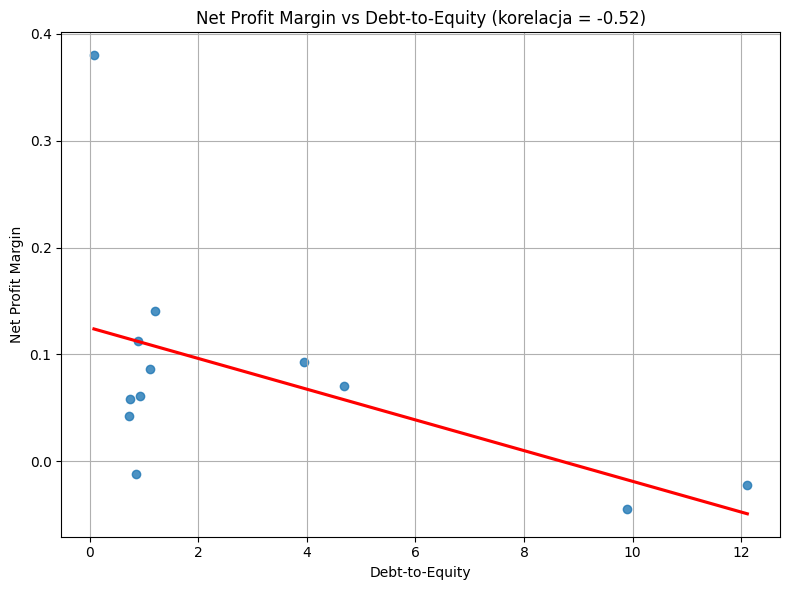

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('all_companies_wide_with_ratios.csv')

# Oblicz korelacje
corr_roa_roe = df["ROA_reported"].corr(df["ROE_reported"])
corr_npm_dte = df["Net_Profit_Margin_Q1_2025"].corr(df["Debt_to_Equity_Q1_2025"])

print(f"Korelacja ROA i ROE: {corr_roa_roe:.2f}")
print(f"Korelacja Net Profit Margin i Debt-to-Equity: {corr_npm_dte:.2f}")

# Scatterplot ROA vs ROE
plt.figure(figsize=(8,6))
sns.regplot(data=df, x="ROA_reported", y="ROE_reported", ci=None, line_kws={"color": "red"})
plt.title(f"ROA vs ROE (korelacja = {corr_roa_roe:.2f})")
plt.xlabel("Return on Assets (ROA)")
plt.ylabel("Return on Equity (ROE)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Scatterplot Net Profit Margin vs Debt-to-Equity
plt.figure(figsize=(8,6))
sns.regplot(data=df, x="Debt_to_Equity_Q1_2025", y="Net_Profit_Margin_Q1_2025", ci=None, line_kws={"color": "red"})
plt.title(f"Net Profit Margin vs Debt-to-Equity (korelacja = {corr_npm_dte:.2f})")
plt.xlabel("Debt-to-Equity")
plt.ylabel("Net Profit Margin")
plt.grid(True)
plt.tight_layout()
plt.show()


In [8]:
import sklearn
print(sklearn.__version__)


1.7.1


Najważniejsze cechy wpływające na PCA1:
                               PCA1      PCA2  abs_PCA1  abs_PCA2
Debt_to_Equity_Q1_2025     0.999625  0.024439  0.999625  0.024439
ROE_Q1_2025               -0.023093  0.984459  0.023093  0.984459
Net_Profit_Margin_Q1_2025 -0.014385  0.083432  0.014385  0.083432
ROA_Q1_2025               -0.003246  0.152586  0.003246  0.152586


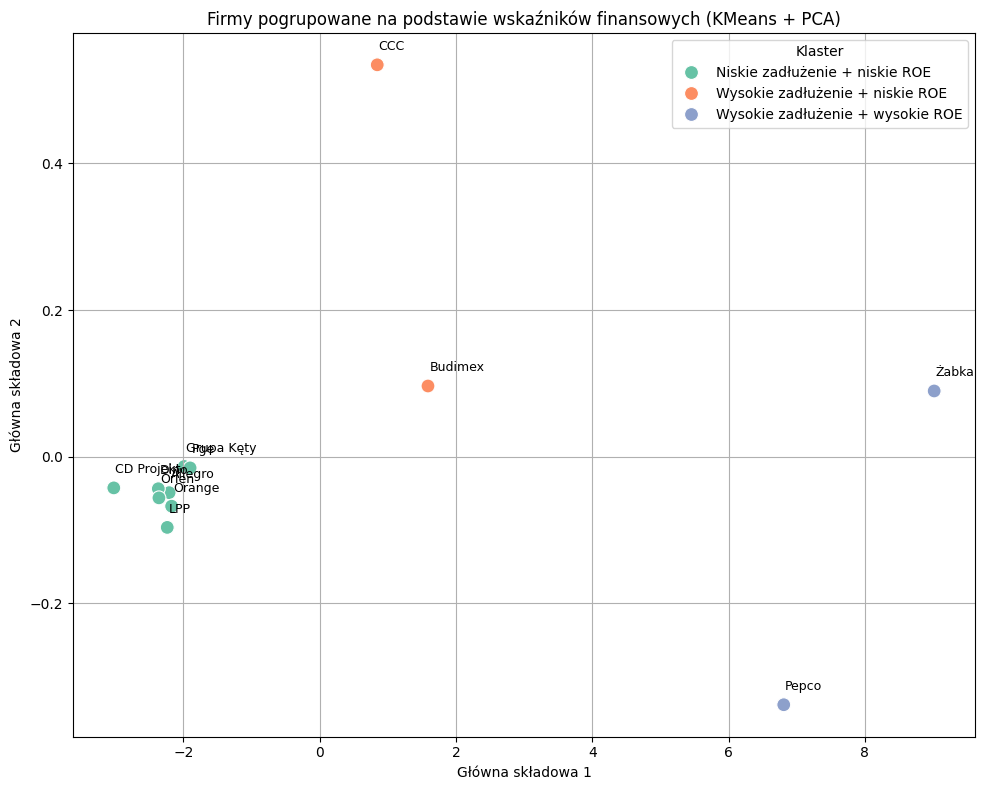

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Wczytanie danych
df = pd.read_csv('all_companies_wide_with_ratios.csv')

# Wybór istotnych cech
features = [
    'ROE_Q1_2025',
    'ROA_Q1_2025',
    'Net_Profit_Margin_Q1_2025',
    'Debt_to_Equity_Q1_2025'
]

# Usunięcie braków danych
df_selected = df[['Company'] + features].dropna()

# Klasteryzacja
kmeans = KMeans(n_clusters=3, random_state=42)
df_selected['Cluster'] = kmeans.fit_predict(df_selected[features])

# Mapowanie nazw klastrów
cluster_labels = {
    0: 'Niskie zadłużenie + niskie ROE',
    1: 'Wysokie zadłużenie + wysokie ROE',
    2: 'Wysokie zadłużenie + niskie ROE'
}
df_selected['Cluster_Label'] = df_selected['Cluster'].map(cluster_labels)

# PCA
pca = PCA(n_components=2)
components = pca.fit_transform(df_selected[features])
df_selected['PCA1'] = components[:, 0]
df_selected['PCA2'] = components[:, 1]

# Interpretacja składowych PCA
pca_components_df = pd.DataFrame(pca.components_, columns=features, index=['PCA1', 'PCA2'])
pca_components_df = pca_components_df.T
pca_components_df['abs_PCA1'] = np.abs(pca_components_df['PCA1'])
pca_components_df['abs_PCA2'] = np.abs(pca_components_df['PCA2'])

print("Najważniejsze cechy wpływające na PCA1:")
print(pca_components_df.sort_values(by='abs_PCA1', ascending=False).head(5))

# Wizualizacja
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PCA1', y='PCA2',
    hue='Cluster_Label',
    data=df_selected,
    palette='Set2',
    s=100
)

# Dodanie nazw firm na wykresie
for i, row in df_selected.iterrows():
    plt.text(row['PCA1'] + 0.02, row['PCA2'] + 0.02, row['Company'], fontsize=9)

plt.title("Firmy pogrupowane na podstawie wskaźników finansowych (KMeans + PCA)")
plt.xlabel("P 1")
plt.ylabel("Główna składowa 2")
plt.legend(title='Klaster')
plt.grid(True)
plt.tight_layout()
plt.show()


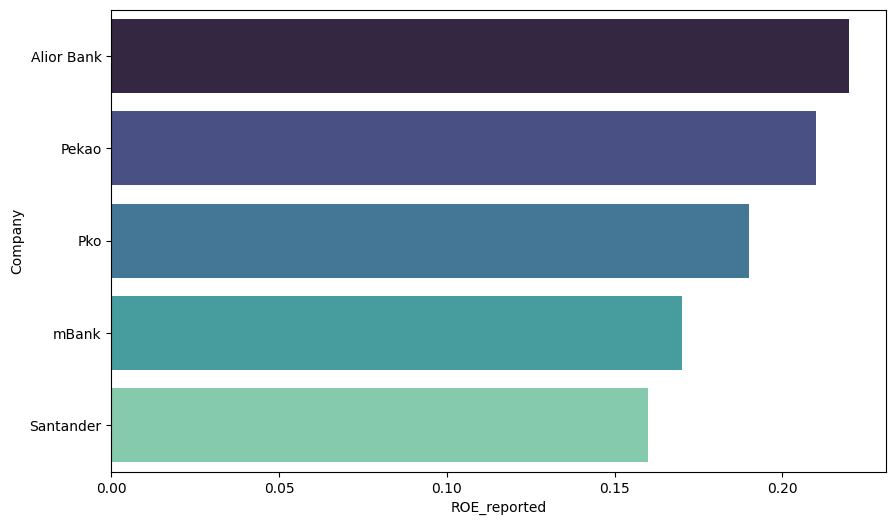

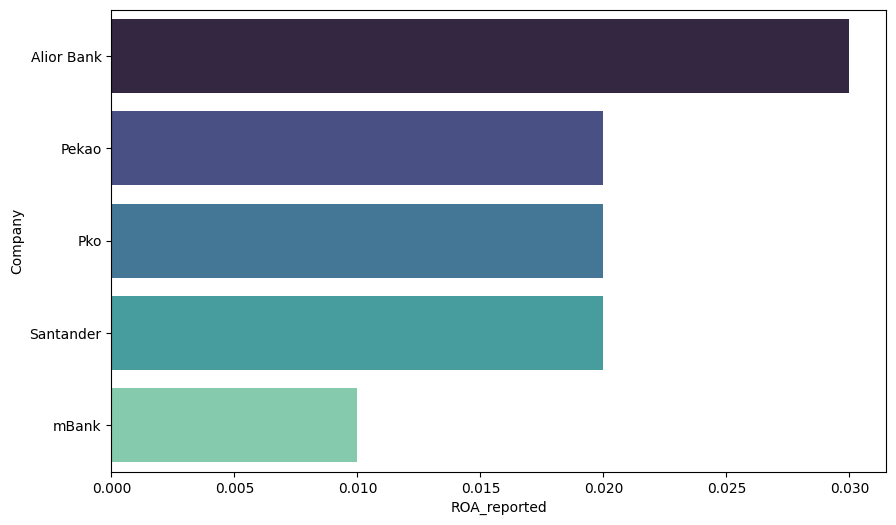

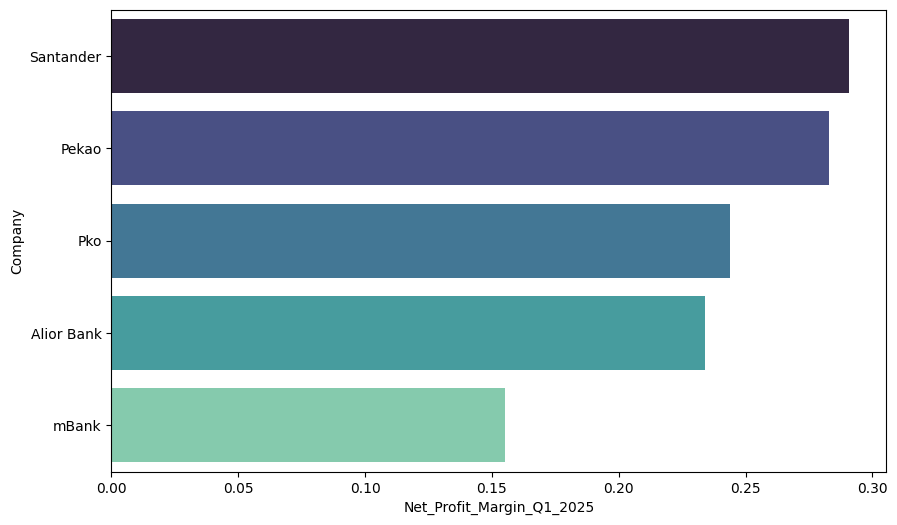

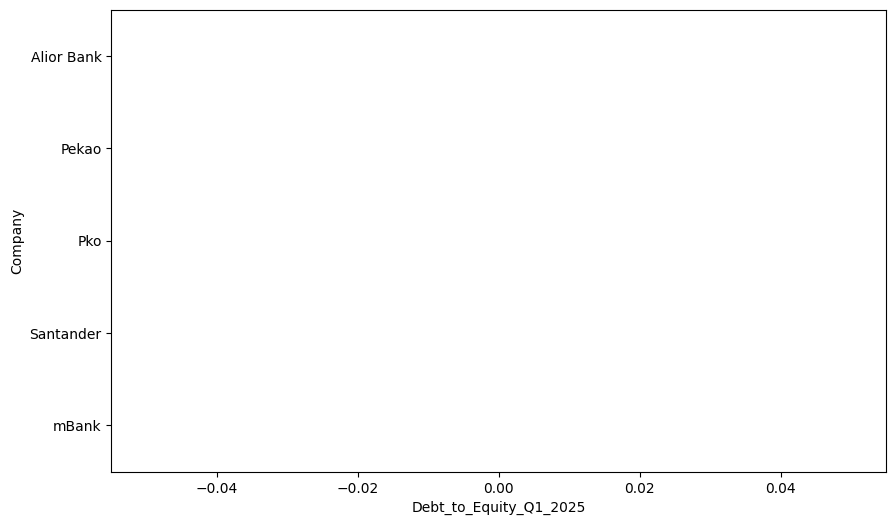

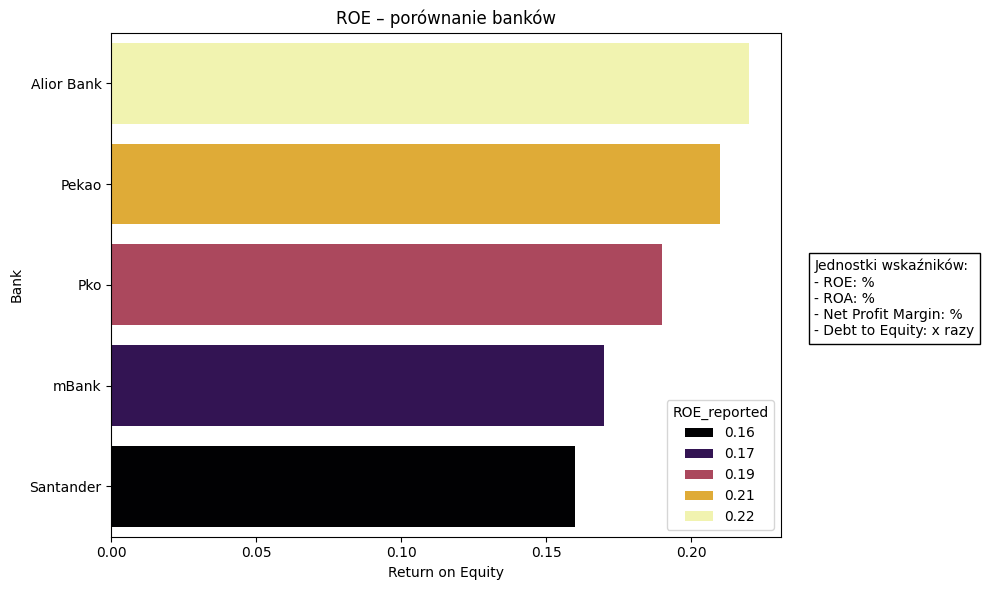

In [35]:
#Porównanie wewnątrzbranżowe - banki
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('all_companies_wide_with_ratios.csv')
df_banki = df[df['Industry'] == 'banking']

features = [
    'ROE_reported',
    'ROA_reported',
    'Net_Profit_Margin_Q1_2025',
    'Debt_to_Equity_Q1_2025'
]

for feature in features:
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=df_banki.sort_values(by=feature, ascending=False),
        x=feature,
        y='Company',
        hue="Company",
        palette='mako'
    )
plt.figure(figsize=(10,6))
sns.barplot(data=df_banki.sort_values(by='ROE_reported', ascending=False),
            x='ROE_reported', y='Company', hue='ROE_reported', palette='inferno')
plt.title("ROE – porównanie banków")
plt.xlabel("Return on Equity")
plt.ylabel("Bank")

unit_text = (
    "Jednostki wskaźników:\n"
    "- ROE: %\n"
    "- ROA: %\n"
    "- Net Profit Margin: %\n"
    "- Debt to Equity: x razy"
)
plt.text(
    x=plt.xlim()[1]*1.05, 
    y=len(df_banki) / 2,   
    s=unit_text,
    fontsize=10,
    bbox=dict(facecolor='white', edgecolor='black')
)
plt.tight_layout()
plt.show()


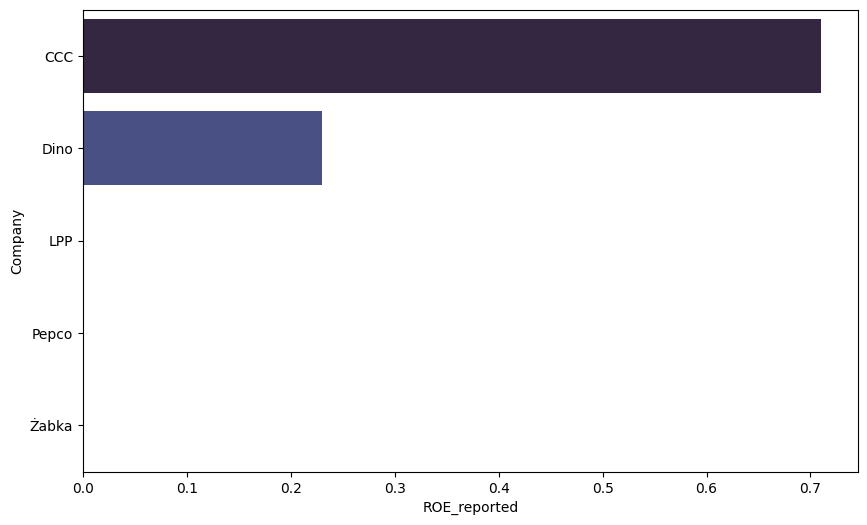

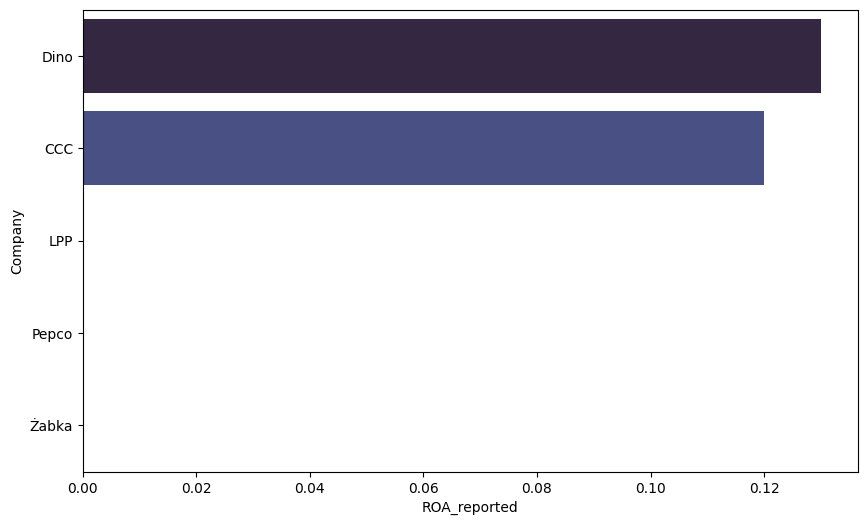

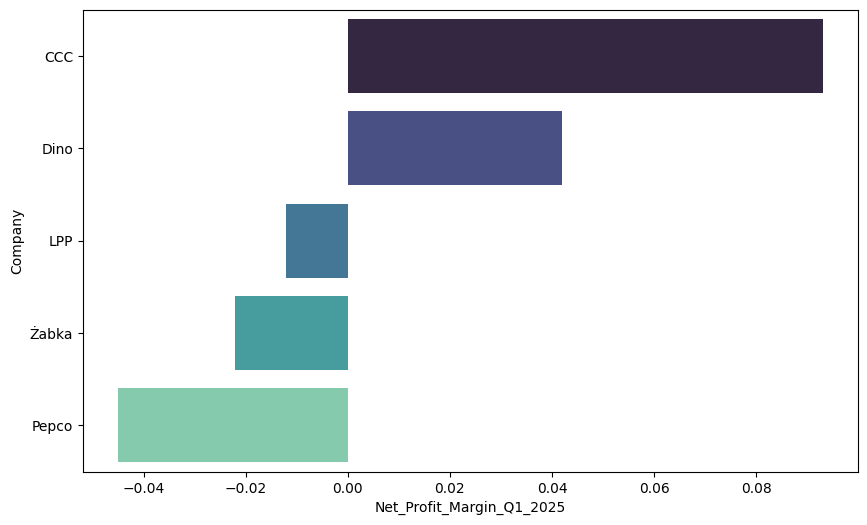

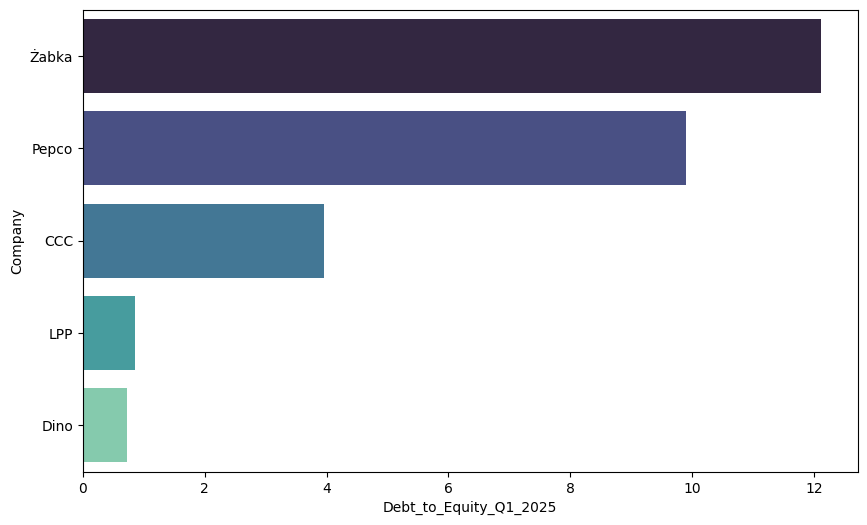

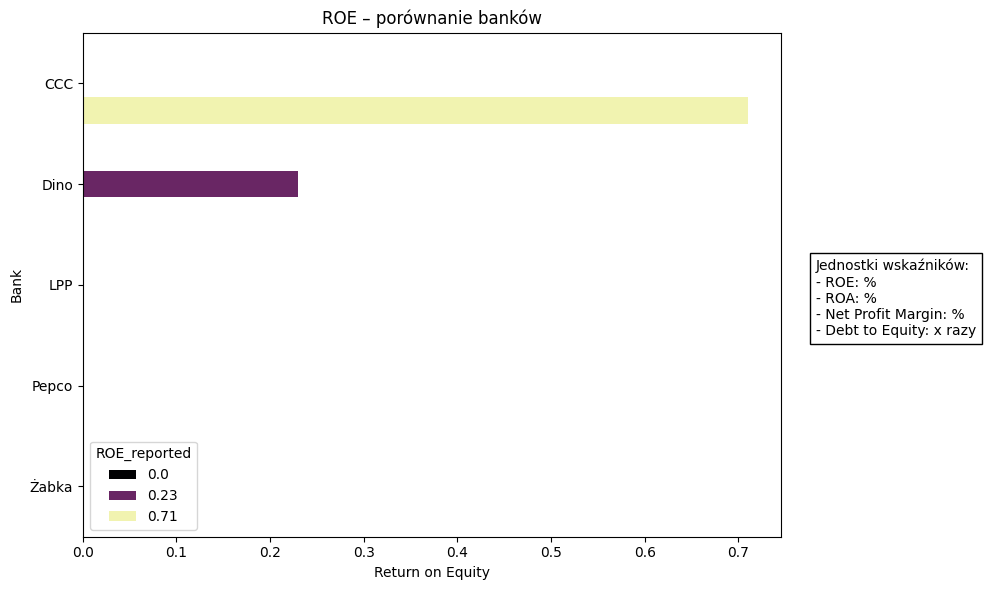

In [36]:
#Porównanie wewnątrzbranżowe - retail 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('all_companies_wide_with_ratios.csv')
df_retail = df[df['Industry'].str.contains('retail', case=False, na=False)]

features = [
    'ROE_reported',
    'ROA_reported',
    'Net_Profit_Margin_Q1_2025',
    'Debt_to_Equity_Q1_2025'
]

for feature in features:
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=df_retail.sort_values(by=feature, ascending=False),
        x=feature,
        y='Company',
        hue="Company",
        palette='mako'
    )
    
plt.figure(figsize=(10,6))
sns.barplot(data=df_retail.sort_values(by='ROE_reported', ascending=False),
            x='ROE_reported', y='Company', hue='ROE_reported', palette='inferno')
plt.title("ROE – porównanie banków")
plt.xlabel("Return on Equity")
plt.ylabel("Bank")

unit_text = (
    "Jednostki wskaźników:\n"
    "- ROE: %\n"
    "- ROA: %\n"
    "- Net Profit Margin: %\n"
    "- Debt to Equity: x razy"
)
plt.text(
    x=plt.xlim()[1]*1.05, 
    y=len(df_retail) / 2,   
    s=unit_text,
    fontsize=10,
    bbox=dict(facecolor='white', edgecolor='black')
)

plt.tight_layout()
plt.show()